## Import Libraries  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf 

In [2]:
# Download historical stock price data for Google from Yahoo Finance
start = '2012-01-01'
end = '2024-06-09'  # End date set to June 9, 2024
stock = 'GOOG'

data = yf.download(stock, start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)

In [4]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...,...
3123,2024-06-03,173.880005,175.860001,172.449997,174.419998,174.419998,20742800
3124,2024-06-04,174.449997,175.190002,173.220001,175.130005,175.130005,14066600
3125,2024-06-05,176.535004,177.970001,175.289993,177.070007,177.070007,15233900
3126,2024-06-06,177.429993,178.710007,177.210007,178.350006,178.350006,14255800


### 1. Starting 10 rows 

In [5]:
data.head(10) 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
5,2012-01-10,15.684959,15.785831,15.365158,15.520326,15.520326,176483032
6,2012-01-11,15.529292,15.675993,15.470015,15.590563,15.590563,96359832
7,2012-01-12,15.721572,15.763166,15.604012,15.682219,15.682219,75289148
8,2012-01-13,15.598035,15.615220,15.468520,15.566403,15.566403,92637933
9,2012-01-17,15.740501,15.740501,15.583589,15.655818,15.655818,76658261


### 2. Ending 10 rows 

In [6]:
data.tail(10) 

,Date,Open,High,Low,Close,Adj Close,Volume
3118,2024-05-24,176.520004,177.304001,175.199997,176.330002,176.330002,11400600
3119,2024-05-28,175.740005,178.509995,175.679993,178.020004,178.020004,15655300
3120,2024-05-29,176.809998,178.229996,176.259995,177.399994,177.399994,15023800
3121,2024-05-30,176.690002,176.690002,173.229996,173.559998,173.559998,18844000
3122,2024-05-31,173.399994,174.419998,170.970001,173.960007,173.960007,28085200
3123,2024-06-03,173.880005,175.860001,172.449997,174.419998,174.419998,20742800
3124,2024-06-04,174.449997,175.190002,173.220001,175.130005,175.130005,14066600
3125,2024-06-05,176.535004,177.970001,175.289993,177.070007,177.070007,15233900
3126,2024-06-06,177.429993,178.710007,177.210007,178.350006,178.350006,14255800
3127,2024-06-07,178.460007,179.419998,175.789993,175.949997,175.949997,14690400


### Info about data 

In [7]:
data.shape 

(3128, 7)

In [8]:
print("Number of rows: ", data.shape[0])
print("Number of columns: ", data.shape[1])  

Number of rows:  3128
Number of columns:  7


In [9]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3128 entries, 0 to 3127
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3128 non-null   datetime64[ns]
 1   Open       3128 non-null   float64       
 2   High       3128 non-null   float64       
 3   Low        3128 non-null   float64       
 4   Close      3128 non-null   float64       
 5   Adj Close  3128 non-null   float64       
 6   Volume     3128 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 171.2 KB


In [10]:
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

## Exploratory Data Analysis (EDA) 

In [11]:
data.describe() 

,Date,Open,High,Low,Close,Adj Close,Volume
count,3128,3128.000000,3128.000000,3128.000000,3128.000000,3128.000000,3.128000e+03
mean,2018-03-21 14:31:55.089513984,63.979295,64.650634,63.355643,64.021407,64.021407,4.304058e+07
min,2012-01-03 00:00:00,13.956189,14.060299,13.861045,13.924059,13.924059,1.584340e+05
25%,2015-02-11 18:00:00,28.512967,28.756549,28.225466,28.476692,28.476692,2.370268e+07
50%,2018-03-21 12:00:00,52.578501,53.199375,51.996000,52.601000,52.601000,3.124900e+07
75%,2021-04-29 06:00:00,95.702501,97.264999,94.393749,95.792500,95.792500,4.963250e+07
max,2024-06-07 00:00:00,178.779999,179.949997,177.309998,179.539993,179.539993,4.995615e+08
std,NaN,41.916555,42.406881,41.488604,41.959526,41.959526,3.472819e+07


In [12]:
data.describe(include='all') 

,Date,Open,High,Low,Close,Adj Close,Volume
count,3128,3128.000000,3128.000000,3128.000000,3128.000000,3128.000000,3.128000e+03
mean,2018-03-21 14:31:55.089513984,63.979295,64.650634,63.355643,64.021407,64.021407,4.304058e+07
min,2012-01-03 00:00:00,13.956189,14.060299,13.861045,13.924059,13.924059,1.584340e+05
25%,2015-02-11 18:00:00,28.512967,28.756549,28.225466,28.476692,28.476692,2.370268e+07
50%,2018-03-21 12:00:00,52.578501,53.199375,51.996000,52.601000,52.601000,3.124900e+07
75%,2021-04-29 06:00:00,95.702501,97.264999,94.393749,95.792500,95.792500,4.963250e+07
max,2024-06-07 00:00:00,178.779999,179.949997,177.309998,179.539993,179.539993,4.995615e+08
std,NaN,41.916555,42.406881,41.488604,41.959526,41.959526,3.472819e+07


### Check Null values in the dataset 

In [13]:
data.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
3123,False,False,False,False,False,False,False
3124,False,False,False,False,False,False,False
3125,False,False,False,False,False,False,False
3126,False,False,False,False,False,False,False


In [14]:
data.isnull().sum() 

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [15]:
ma_100_days = data.Close.rolling(100).mean() 

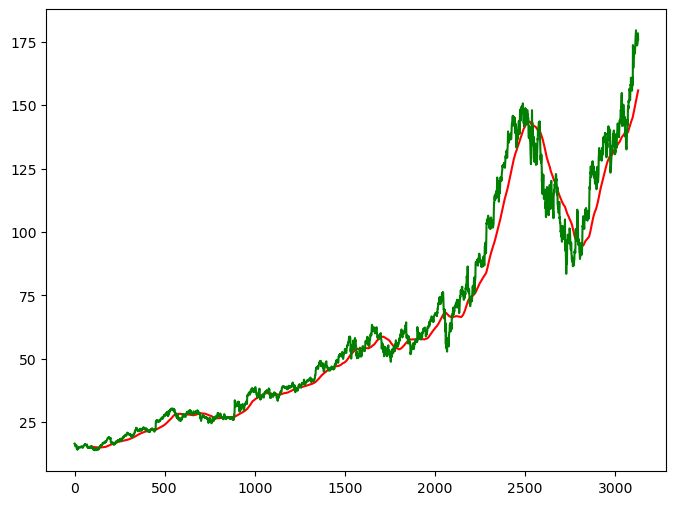

In [16]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show() 

In [17]:
ma_200_days = data.Close.rolling(200).mean()

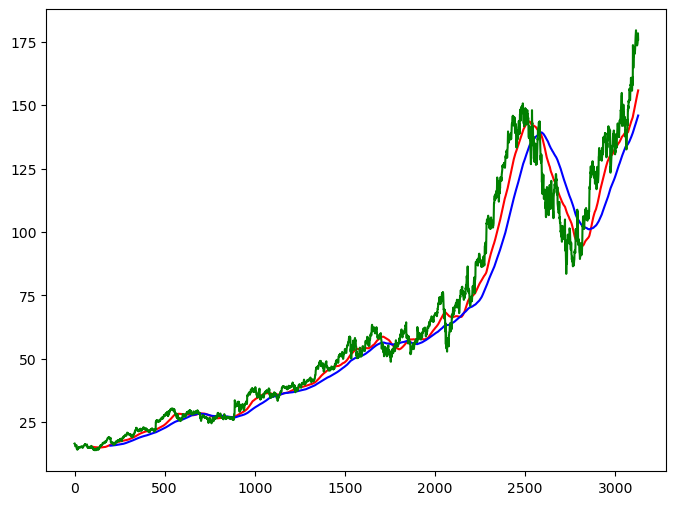

In [18]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

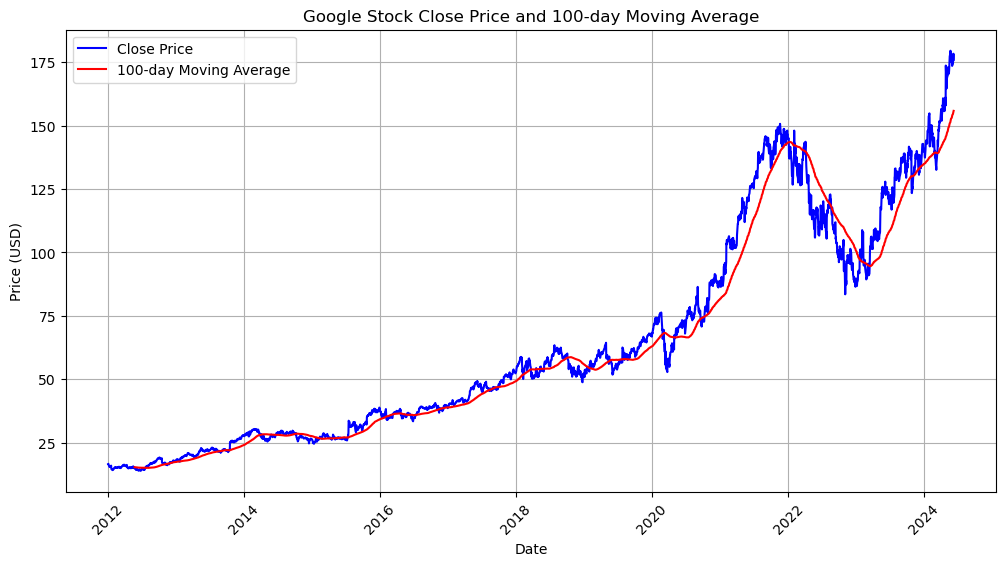

In [19]:
# Calculate the 100-day moving average
ma_100_days = data.Close.rolling(100).mean()

# Plot the 'Close' prices and the 100-day moving average
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price', color='b')
plt.plot(data['Date'], ma_100_days, label='100-day Moving Average', color='r')
plt.title('Google Stock Close Price and 100-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

### Data Visualization  

In [20]:
import seaborn as sns

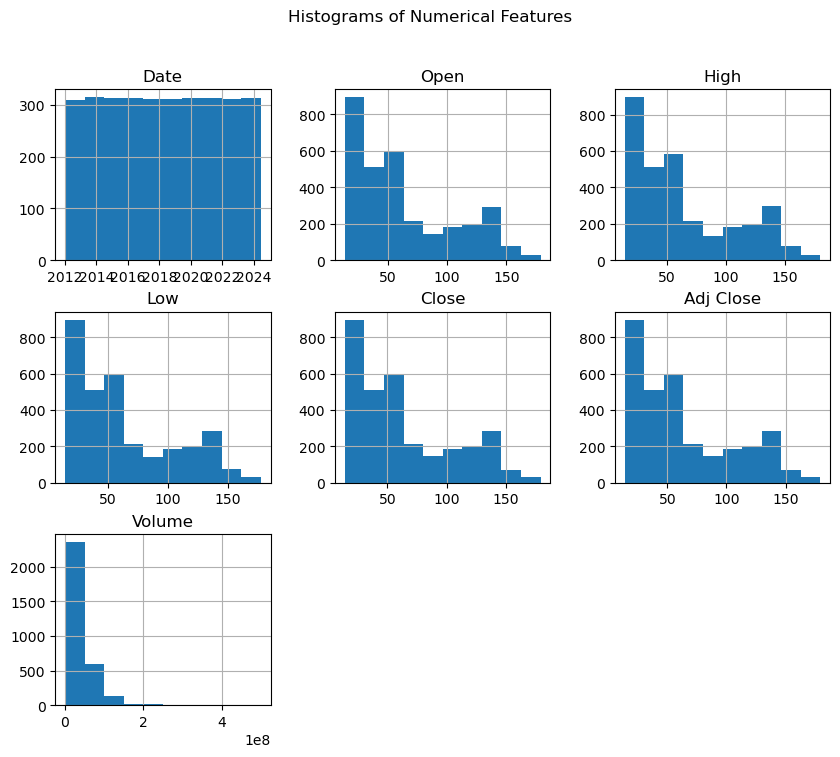

In [21]:
# Histograms
data.hist(figsize=(10, 8))
plt.suptitle('Histograms of Numerical Features')
plt.show() 

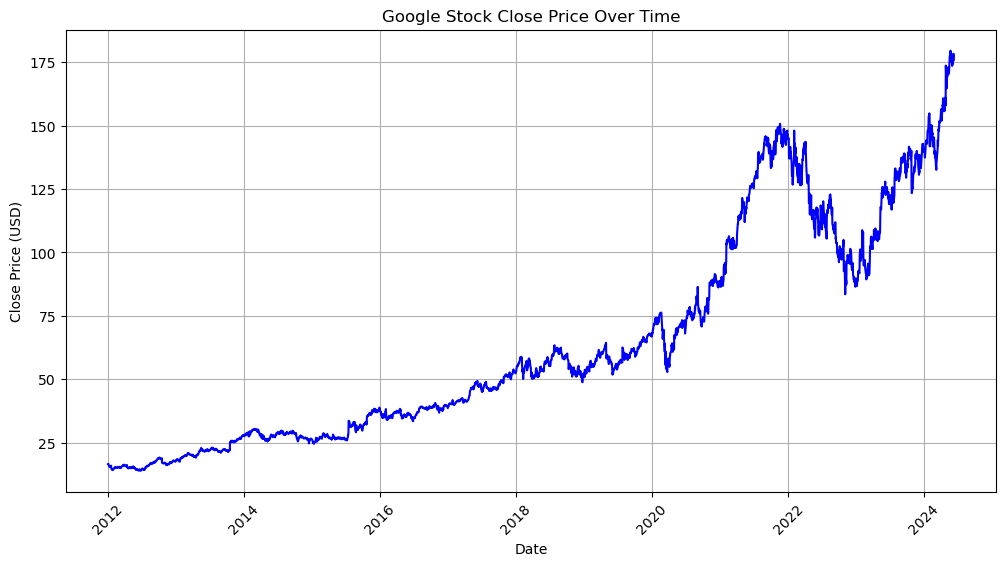

In [22]:
# Time Series Plot
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], color='b')
plt.title('Google Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

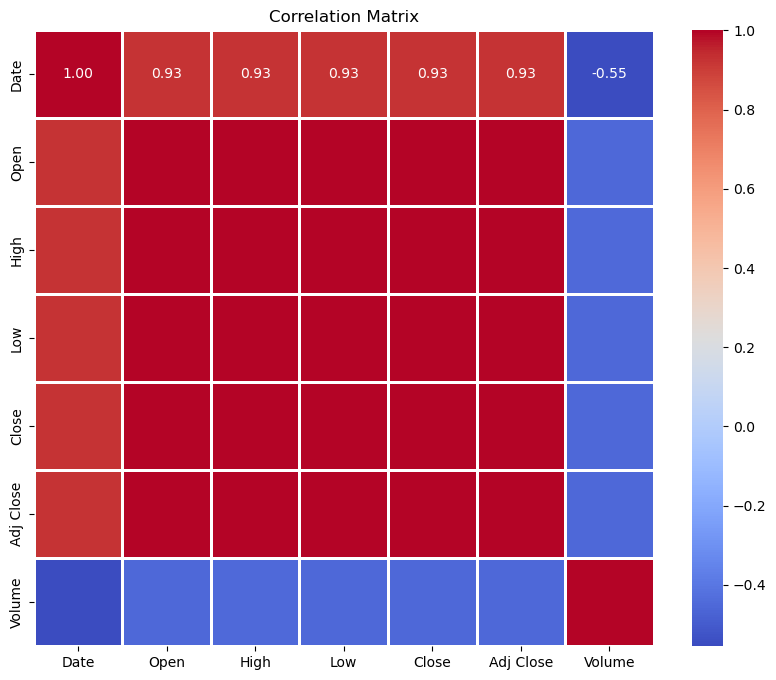

In [23]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.title('Correlation Matrix')
plt.show()

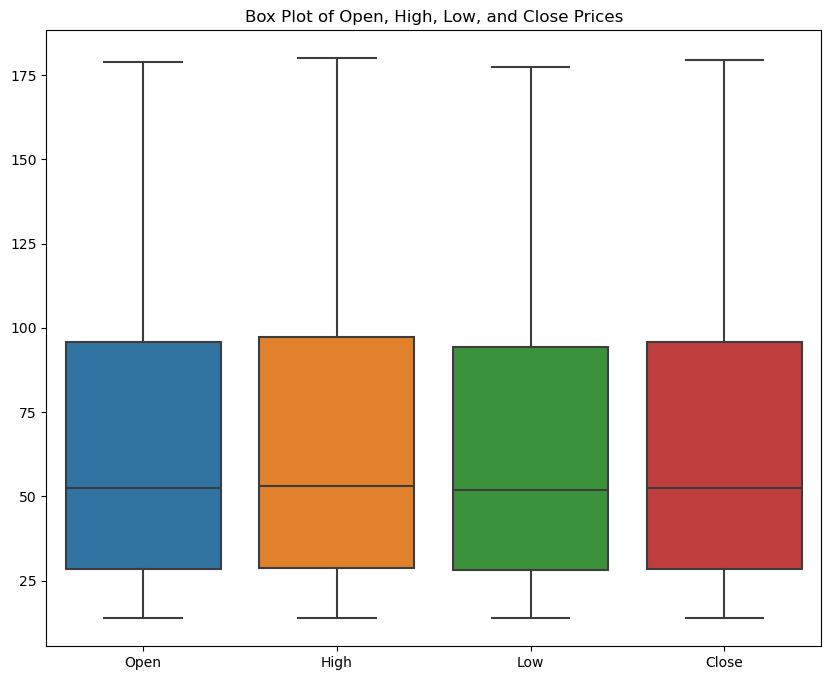

In [24]:
# Box Plot for Outliers
plt.figure(figsize=(10, 8))
sns.boxplot(data=data[['Open', 'High', 'Low', 'Close']])
plt.title('Box Plot of Open, High, Low, and Close Prices')
plt.show()

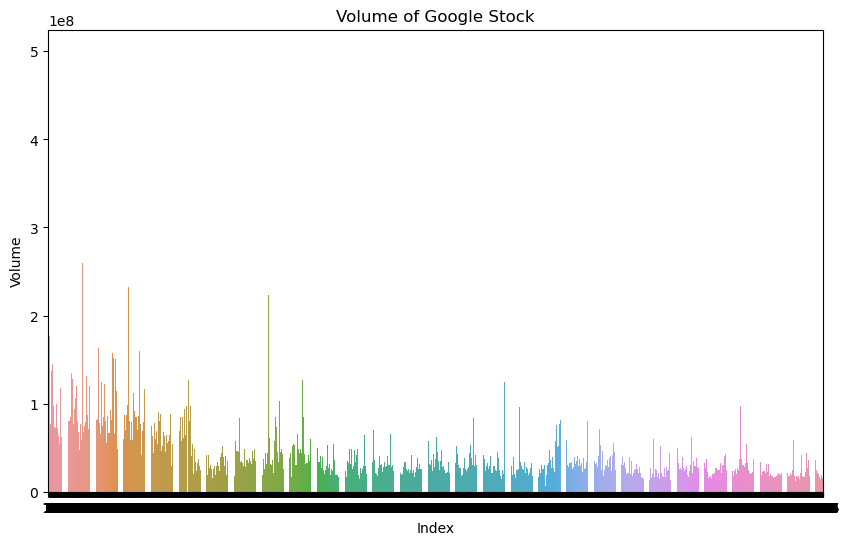

In [25]:
# Bar Plot for Volume
plt.figure(figsize=(10, 6))
sns.barplot(x=data.index, y='Volume', data=data)
plt.title('Volume of Google Stock')
plt.xlabel('Index')
plt.ylabel('Volume')
plt.show()

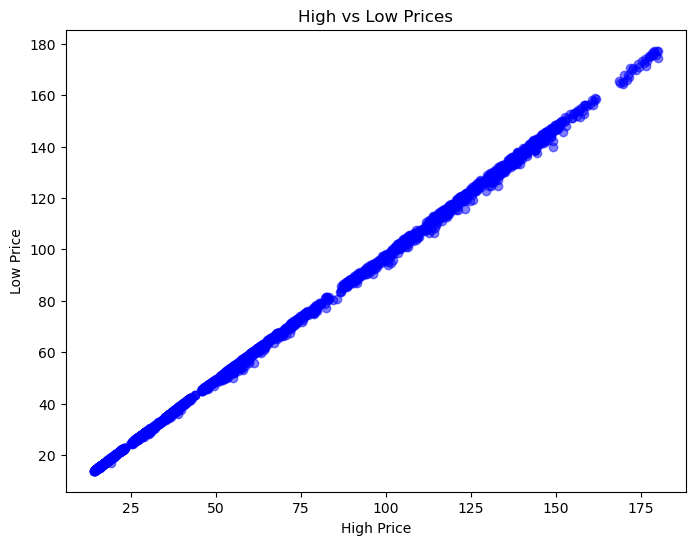

In [26]:
# Scatter Plot for High vs Low
plt.figure(figsize=(8, 6))
plt.scatter(data['High'], data['Low'], color='b', alpha=0.5)
plt.title('High vs Low Prices')
plt.xlabel('High Price')
plt.ylabel('Low Price')
plt.show()

## Model Selection 

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [28]:
# Define features (X) and target (y)
X = data[['Open', 'High', 'Low', 'Volume']]  # Using Open, High, Low, and Volume as features
y = data['Close']  # Target variable

In [29]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 1. Random Forest 

In [30]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

In [31]:
# Evaluate Random Forest Regressor
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

In [32]:
print("Random Forest Regressor Performance:")
print("Mean Squared Error:", rf_mse)
print("Mean Absolute Error:", rf_mae)
print("R^2 Score:", rf_r2)
print()


Random Forest Regressor Performance:
Mean Squared Error: 0.43170369526355856
Mean Absolute Error: 0.3790884131897751
R^2 Score: 0.9997662587406302



### 2. Gradient Boosting  

In [33]:
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)


In [34]:
# Evaluate Gradient Boosting Regressor
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_mae = mean_absolute_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)

In [35]:
print("Gradient Boosting Regressor Performance:")
print("Mean Squared Error:", gb_mse)
print("Mean Absolute Error:", gb_mae)
print("R^2 Score:", gb_r2)
print()

Gradient Boosting Regressor Performance:
Mean Squared Error: 0.5406427865583776
Mean Absolute Error: 0.45863076650092577
R^2 Score: 0.9997072748573018



In [36]:
gb_train_pred = gb_model.predict(X_train)
gb_test_pred = gb_model.predict(X_test)

In [37]:
# Calculate Mean Squared Error for Gradient Boosting
gb_train_mse = mean_squared_error(y_train, gb_train_pred)
gb_test_mse = mean_squared_error(y_test, gb_test_pred)

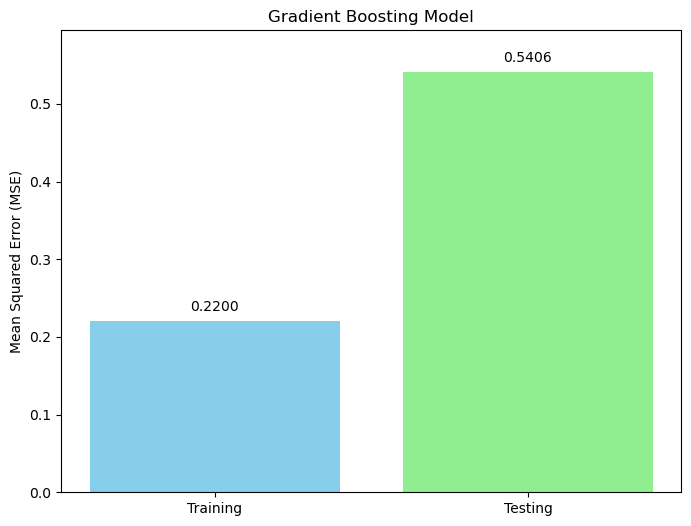

In [38]:
#  Plotting Mean Squared Error for Gradient Boosting
plt.figure(figsize=(8, 6))
plt.bar(['Training', 'Testing'], [gb_train_mse, gb_test_mse], color=['skyblue', 'lightgreen'])
plt.title('Gradient Boosting Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.ylim(0, max(gb_train_mse, gb_test_mse) * 1.1)  # Set y-axis limit slightly above the maximum value
for i, v in enumerate([gb_train_mse, gb_test_mse]):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom', fontsize=10)
plt.show()

### Comparison 

In [39]:
# Define Mean Squared Error for each model
rf_mse_train = mean_squared_error(y_train, rf_model.predict(X_train))
rf_mse_test = mean_squared_error(y_test, rf_model.predict(X_test))

gb_mse_train = mean_squared_error(y_train, gb_model.predict(X_train))
gb_mse_test = mean_squared_error(y_test, gb_model.predict(X_test))

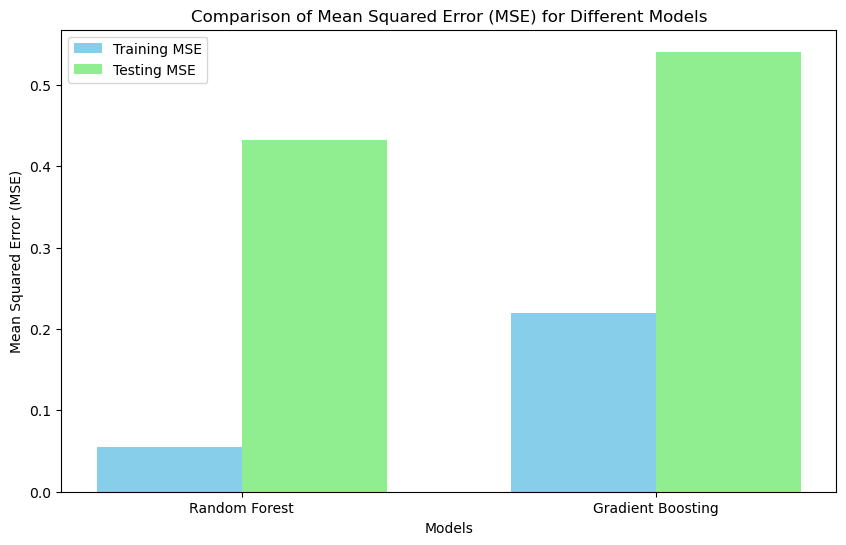

In [40]:
# Plotting Mean Squared Error for all three models
plt.figure(figsize=(10, 6))
models = ['Random Forest', 'Gradient Boosting']
mse_train = [rf_mse_train, gb_mse_train]
mse_test = [rf_mse_test, gb_mse_test]

bar_width = 0.35
index = range(len(models))

plt.bar(index, mse_train, bar_width, label='Training MSE', color='skyblue')
plt.bar([i + bar_width for i in index], mse_test, bar_width, label='Testing MSE', color='lightgreen')

plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Mean Squared Error (MSE) for Different Models')
plt.xticks([i + bar_width / 2 for i in index], models)
plt.legend()
plt.show()

As this plot shows Gradient Boosting Machine works well. 

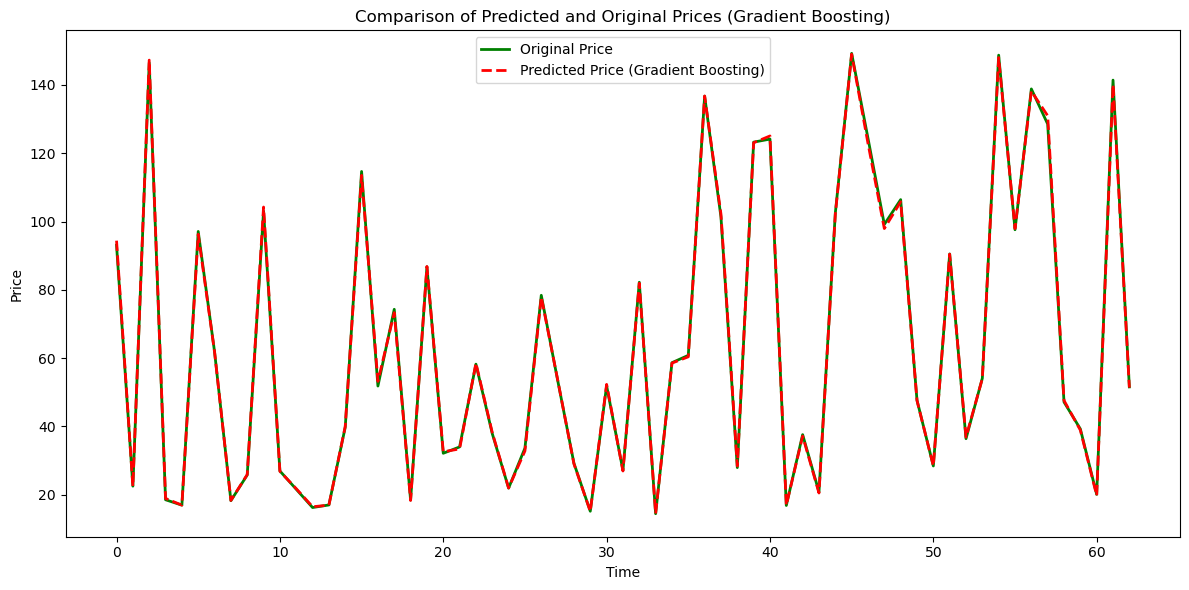

In [41]:
# Plotting the predicted and original prices
plt.figure(figsize=(12, 6))
plt.plot(y_test.values[::10], 'g', label='Original Price', linewidth=2)  # Display every 10th data point
plt.plot(gb_y_pred[::10], 'r', label='Predicted Price (Gradient Boosting)', linestyle='--', linewidth=2)  # Display every 10th data point
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.title('Comparison of Predicted and Original Prices (Gradient Boosting)')
plt.tight_layout()
plt.show()

In [42]:
import joblib

In [43]:
# Train your model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [44]:
# Save the trained model to a file
joblib.dump(gb_model, 'Stock_Market.pkl')


['Stock_Market.pkl']